<a href="https://colab.research.google.com/github/sahanirambukpitiya/Client-Subscription/blob/main/Solution_174128V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import svm, datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from math import sqrt

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data_set = pd.read_csv('/content/gdrive/My Drive/ML/Data/banking.csv')
data_set.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,191,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [ ]:
data_set.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [ ]:
data_set.shape

(41188, 21)

In [ ]:
data_set.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
data_set.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [ ]:
df = pd.DataFrame(data_set, columns=data_set.columns)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
# Drop the duration column
df =  df.drop('duration', axis=1)
df.shape

(41188, 20)

In [ ]:
# Check whether any missing values are available
df.isnull().values.any()

False

In [ ]:
df.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp_var_rate       10
cons_price_idx     26
cons_conf_idx      26
euribor3m         316
nr_employed        11
y                   2
dtype: int64

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [ ]:
# get the numerical columns from the dataset
numerical_df = df.select_dtypes(include=np.number)
# get the information about numerical columns
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   campaign        41188 non-null  int64  
 2   pdays           41188 non-null  int64  
 3   previous        41188 non-null  int64  
 4   emp_var_rate    41188 non-null  float64
 5   cons_price_idx  41188 non-null  float64
 6   cons_conf_idx   41188 non-null  float64
 7   euribor3m       41188 non-null  float64
 8   nr_employed     41188 non-null  float64
 9   y               41188 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


In [ ]:
numerical_cols = numerical_df.columns
print(numerical_cols)

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [ ]:
numerical_df.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
numerical_df.shape

(41188, 10)

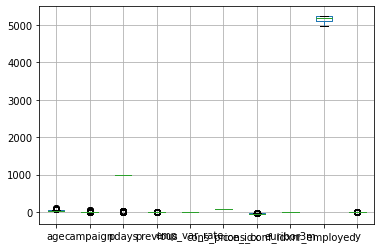

In [ ]:
#Check the outliers
numerical_df.boxplot()

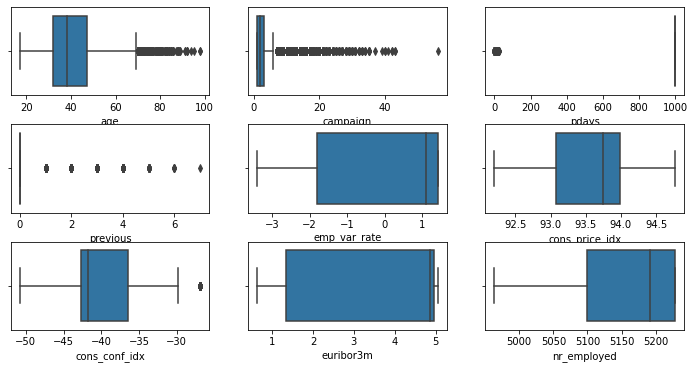

In [ ]:
#Check any outliers in the dataset under each feature 

warnings.filterwarnings("ignore")

#for each column draw the boxplot

columns = numerical_cols
fig, axes = plt.subplots(3,3,figsize=(10,5))
plt.tight_layout(0.8)

sns.boxplot(numerical_df[columns[0]],orient = 'v',ax = axes[0,0])
sns.boxplot(numerical_df[columns[1]],orient = 'v',ax = axes[0,1])
sns.boxplot(numerical_df[columns[2]],orient = 'v',ax = axes[0,2])
sns.boxplot(numerical_df[columns[3]],orient = 'v',ax = axes[1,0])
sns.boxplot(numerical_df[columns[4]],orient = 'v',ax = axes[1,1])
sns.boxplot(numerical_df[columns[5]],orient = 'v',ax = axes[1,2])
sns.boxplot(numerical_df[columns[6]],orient = 'v',ax = axes[2,0])
sns.boxplot(numerical_df[columns[7]],orient = 'v',ax = axes[2,1])
sns.boxplot(numerical_df[columns[8]],orient = 'v',ax = axes[2,2])
plt.show()

In [ ]:
# Check outliers for campaign column
len(numerical_df[numerical_df[columns[1]] >50])

1

In [ ]:
# Check outliers for pdays column
len(numerical_df[numerical_df[columns[2]] < 200])

1515

In [ ]:
# Check outliers for cons_conf_idx column
len(numerical_df[numerical_df[columns[6]] > -30])

714

In [ ]:
# dropping outliers in the campaign column
new_df = df.drop(df[df['campaign'] > 50].index)
print("Before Shape:",df.shape)
print("After Shape:",new_df.shape)

# reset indexes
new_df = new_df.reset_index(drop=True)
numerical_df = new_df.select_dtypes(include=np.number)
print("Numerical DF Shape:",numerical_df.shape)

Before Shape: (41188, 20)
After Shape: (41187, 20)
Numerical DF Shape: (41187, 10)


In [ ]:
# put the target (y) in another dataframe
df_features = numerical_df.drop('y',axis=1)
target = pd.DataFrame(numerical_df['y'], columns=["y"])
numerical_df = df_features

In [ ]:
numerical_df.shape

(41187, 9)

In [ ]:
numerical_df.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,53,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,1,3,1,-2.9,92.201,-31.4,0.869,5076.2


In [ ]:
target.head()

,y
0,0
1,0
2,1
3,0
4,1


In [ ]:
target.shape

(41187, 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89f143aa10>,
      dtype=object)

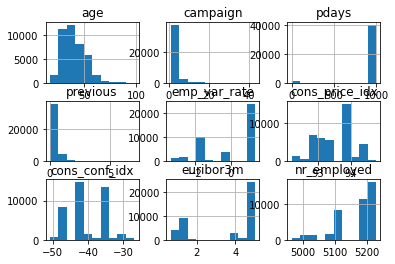

In [ ]:
#Check any Transformations are required. 
numerical_df.hist()

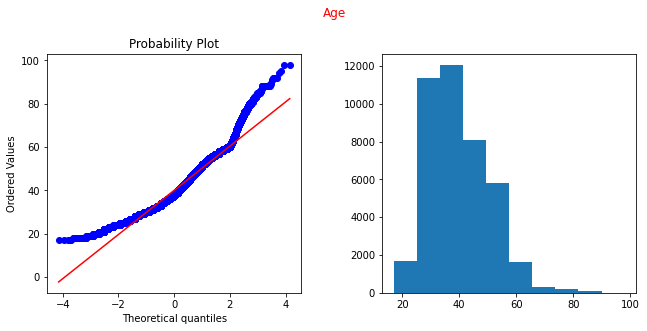

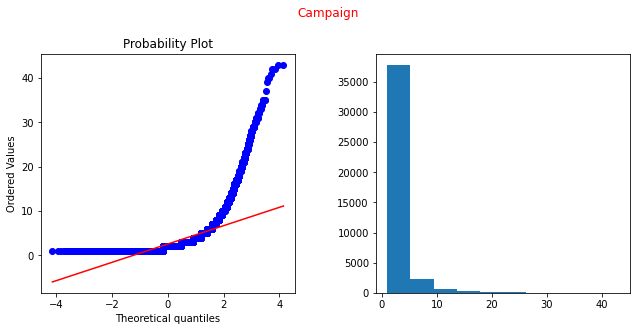

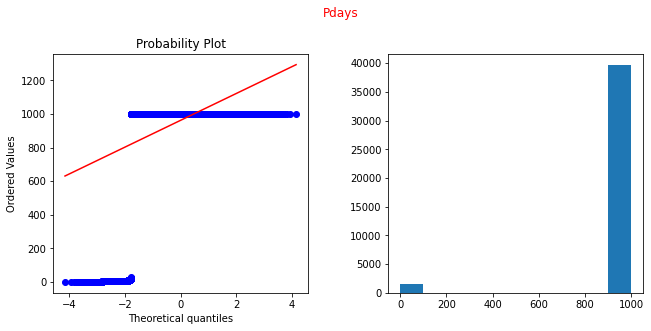

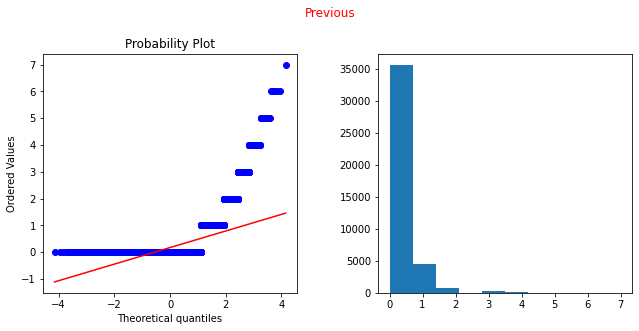

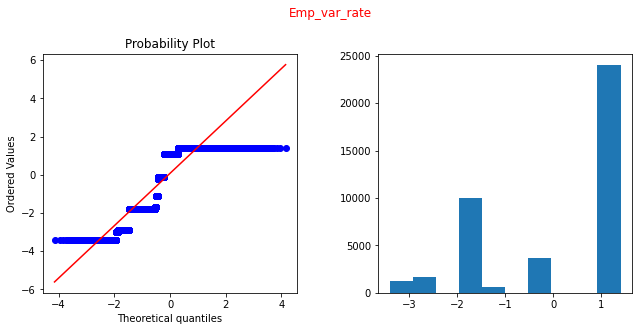

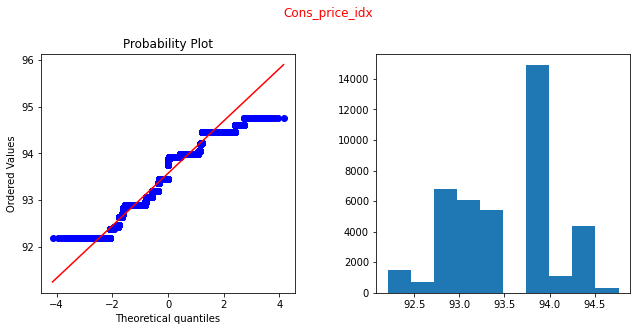

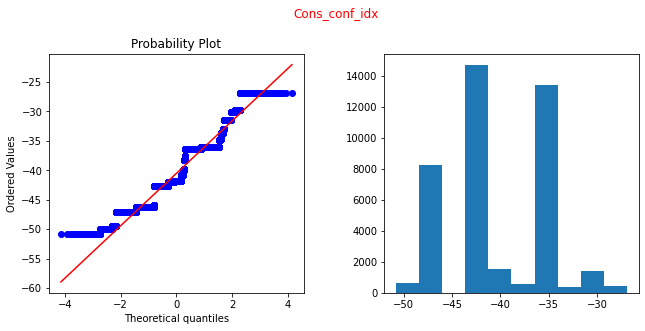

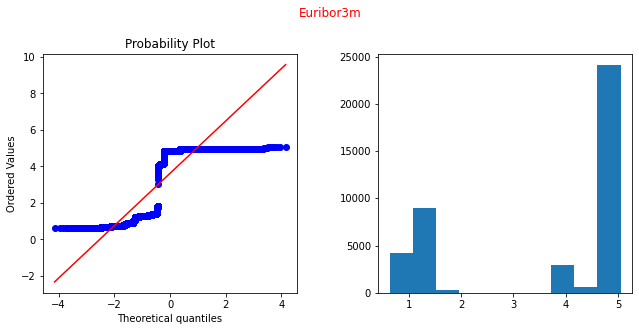

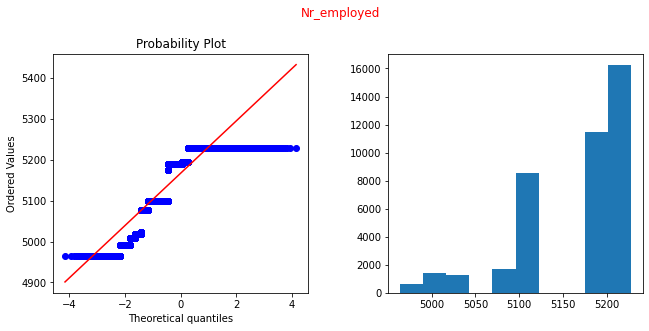

In [ ]:
# Q-Q Plots and Histograms

i = 0

while i < len(numerical_df.columns):
  fig, axes = plt.subplots(1,2,figsize=(10,5))
  plt.tight_layout(pad=5)
  fig.suptitle(numerical_df.columns[i].capitalize(), color='red')
  stats.probplot(numerical_df[numerical_df.columns[i]], dist="norm", plot=axes[0])
  axes[1].hist(numerical_df[numerical_df.columns[i]])
  i = i+1
  plt.show();

In [ ]:
numerical_df.dtypes

age                 int64
campaign            int64
pdays               int64
previous            int64
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
dtype: object

In [ ]:
print(max(numerical_df['age']))
print(max(numerical_df['campaign']))
print(max(numerical_df['previous']))

98
43
7


In [ ]:
print(min(numerical_df['age']))
print(min(numerical_df['campaign']))
print(min(numerical_df['previous']))

17
1
0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89f1442ed0>,
      dtype=object)

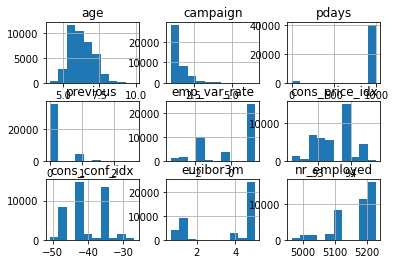

In [ ]:
# Do the trasnformations for required right skewed features

sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation
columns_r = ['age', 'campaign', 'previous']
data_new = sqrt_transformer.transform(numerical_df[columns_r])
df_new = pd.DataFrame(data_new, columns=columns_r)

numerical_df['age'] = data_new[:, 0]
numerical_df['campaign'] = data_new[:, 1]
numerical_df['previous'] = data_new[:,2]

numerical_df.hist()

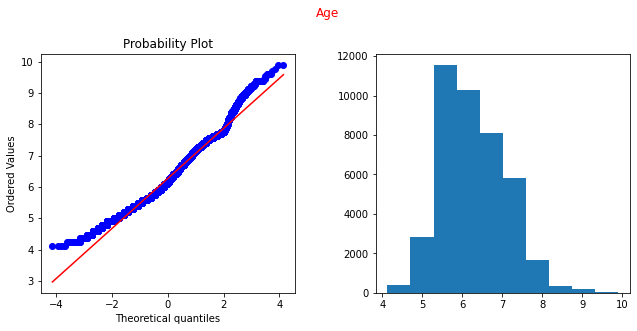

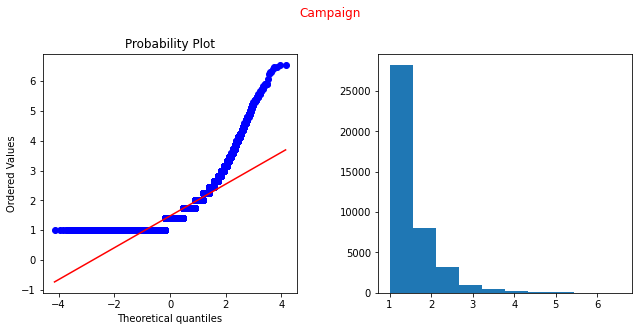

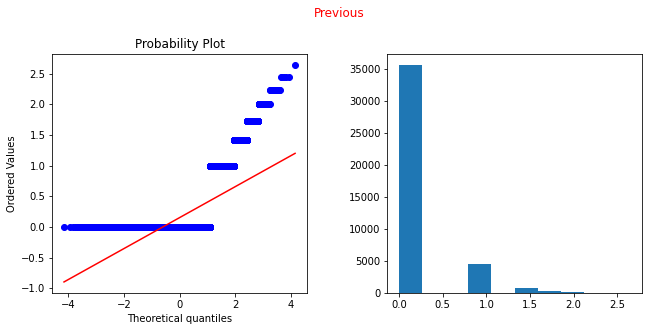

In [ ]:
# Q-Q Plots and Histograms

i = 0

while i < len(columns_r):
  fig, axes = plt.subplots(1,2,figsize=(10,5))
  plt.tight_layout(pad=5)
  fig.suptitle(columns_r[i].capitalize(), color='red')
  stats.probplot(numerical_df[columns_r[i]], dist="norm", plot=axes[0])
  axes[1].hist(numerical_df[columns_r[i]])
  i = i+1
  plt.show();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89f0b74610>,
      dtype=object)

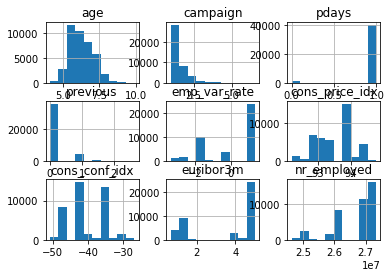

In [ ]:
# Do the trasnformations for required left skewed features

columns_l = ['pdays','nr_employed']
powered_transformer = FunctionTransformer(lambda x: x ** 2, validate=True) 

# apply the transformation 
data_new1 = powered_transformer.transform(numerical_df[columns_l])
exp_df = pd.DataFrame(data_new1, columns=columns_l)

# replace new values with previous data frame
numerical_df['pdays'] = exp_df['pdays']
numerical_df['nr_employed'] = exp_df['nr_employed']
numerical_df.hist()

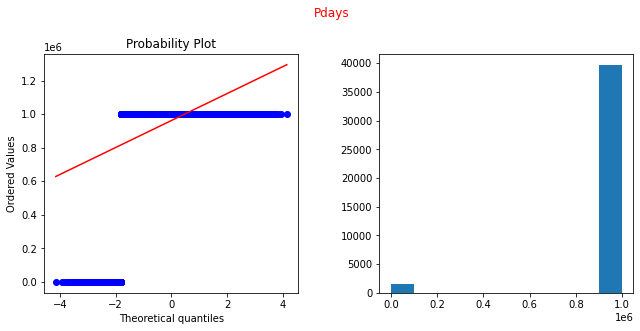

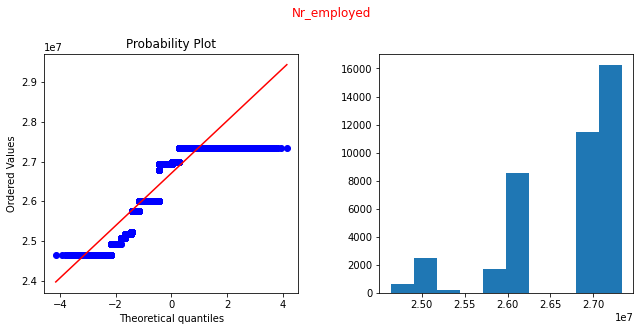

In [ ]:
# Q-Q Plots and Histograms

i = 0

while i < len(columns_l):
  fig, axes = plt.subplots(1,2,figsize=(10,5))
  plt.tight_layout(pad=5)
  fig.suptitle(columns_l[i].capitalize(), color='red')
  stats.probplot(numerical_df[columns_l[i]], dist="norm", plot=axes[0])
  axes[1].hist(numerical_df[columns_l[i]])
  i = i+1
  plt.show();

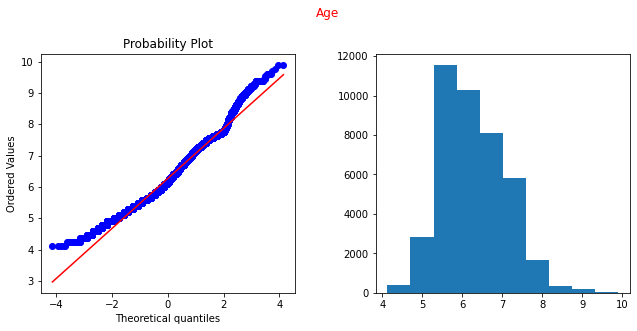

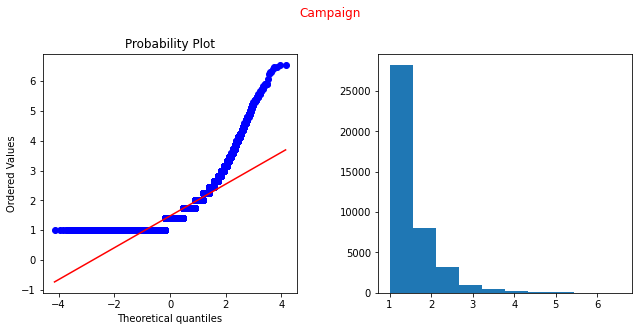

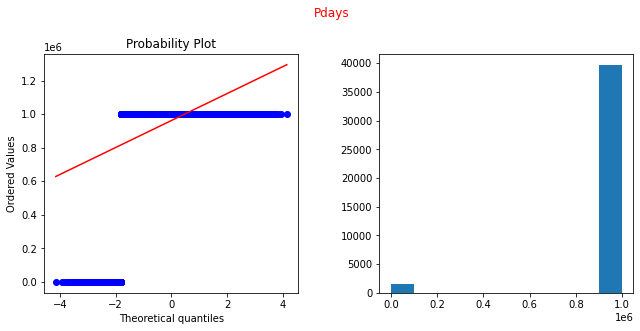

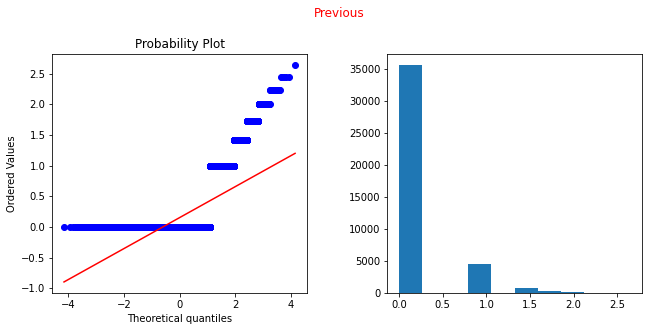

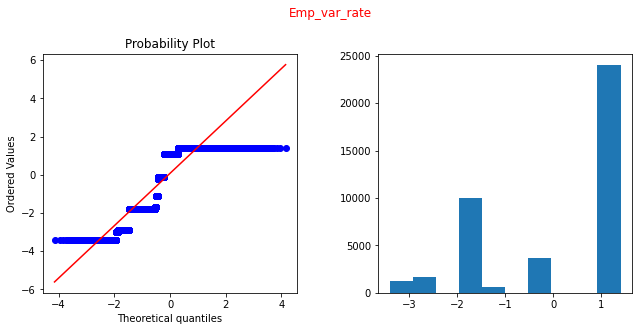

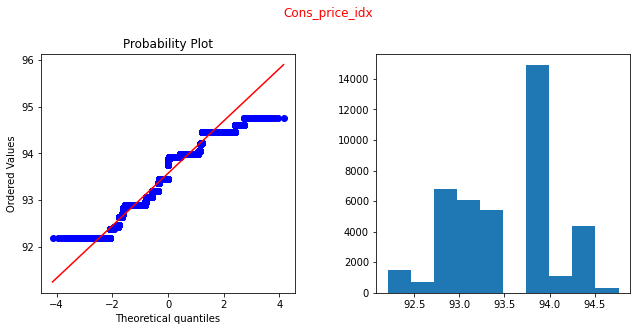

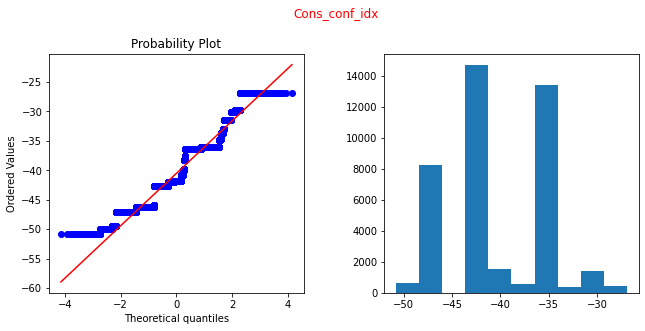

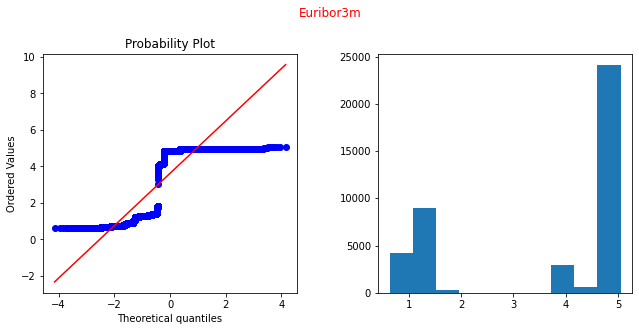

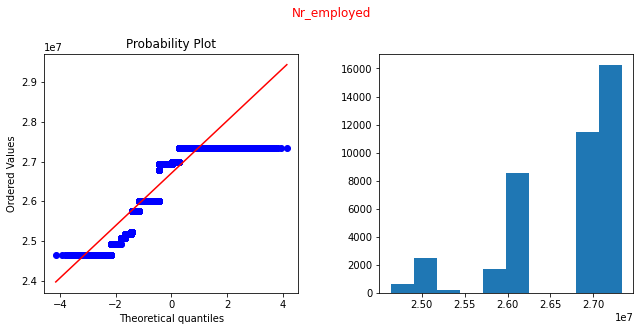

In [ ]:
# Q-Q Plots and Histograms

i = 0

while i < len(numerical_df.columns):
  fig, axes = plt.subplots(1,2,figsize=(10,5))
  plt.tight_layout(pad=5)
  fig.suptitle(numerical_df.columns[i].capitalize(), color='red')
  stats.probplot(numerical_df[numerical_df.columns[i]], dist="norm", plot=axes[0])
  axes[1].hist(numerical_df[numerical_df.columns[i]])
  i = i+1
  plt.show();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89f0be2710>,
      dtype=object)

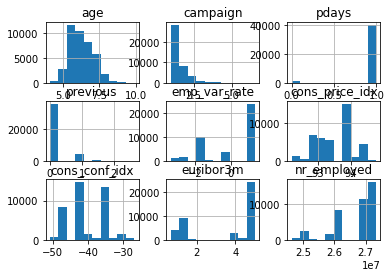

In [ ]:
numerical_df.hist()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [ ]:
numerical_df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

In [ ]:
# get the categorical columns from the dataset
categorical_df = new_df.select_dtypes(exclude=np.number)
# get the information about categorical columns
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41187 entries, 0 to 41186
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41187 non-null  object
 1   marital      41187 non-null  object
 2   education    41187 non-null  object
 3   default      41187 non-null  object
 4   housing      41187 non-null  object
 5   loan         41187 non-null  object
 6   contact      41187 non-null  object
 7   month        41187 non-null  object
 8   day_of_week  41187 non-null  object
 9   poutcome     41187 non-null  object
dtypes: object(10)
memory usage: 3.1+ MB


In [ ]:
categorical_cols = categorical_df.columns
print(categorical_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [ ]:
categorical_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


In [ ]:
categorical_df.dtypes

job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
dtype: object

In [ ]:
categorical_df.shape

(41187, 10)

In [ ]:
i = 0
while (i < len(categorical_cols)):
 print(categorical_cols[i]) 
 print(categorical_df[categorical_cols[i]].value_counts())
 i = i+1

job
admin.           10421
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital
married     24927
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education
university.degree      12167
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default
no         32588
unknown     8596
yes            3
Name: default, dtype: int64
housing
yes        21576
no         18622
unknown      989
Name: housing, dtype: int64
loan
no         33950
yes         6248
unknown      989
Name: loan, dtype: int64
contact
cellular     26144
telephone    15043
Name: contact, 

In [ ]:
#Convert to categorical type, then assign categorical codes to the attributes
i = 0
while (i < len(categorical_cols)): 
 categorical_df[categorical_cols[i]] = categorical_df[categorical_cols[i]].astype('category').cat.codes
 i = i+1
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41187 entries, 0 to 41186
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   job          41187 non-null  int8 
 1   marital      41187 non-null  int8 
 2   education    41187 non-null  int8 
 3   default      41187 non-null  int8 
 4   housing      41187 non-null  int8 
 5   loan         41187 non-null  int8 
 6   contact      41187 non-null  int8 
 7   month        41187 non-null  int8 
 8   day_of_week  41187 non-null  int8 
 9   poutcome     41187 non-null  int8 
dtypes: int8(10)
memory usage: 402.3 KB


In [ ]:
categorical_df.shape

(41187, 10)

In [ ]:
i = 0
while (i < len(categorical_cols)):
 print(categorical_cols[i]) 
 print(categorical_df[categorical_cols[i]].value_counts())
 i = i+1

job
0     10421
1      9254
9      6743
7      3969
4      2924
5      1720
2      1456
6      1421
3      1060
10     1014
8       875
11      330
Name: job, dtype: int64
marital
1    24927
2    11568
0     4612
3       80
Name: marital, dtype: int64
education
6    12167
3     9515
2     6045
5     5243
0     4176
1     2292
7     1731
4       18
Name: education, dtype: int64
default
0    32588
1     8596
2        3
Name: default, dtype: int64
housing
2    21576
0    18622
1      989
Name: housing, dtype: int64
loan
0    33950
2     6248
1      989
Name: loan, dtype: int64
contact
0    26144
1    15043
Name: contact, dtype: int64
month
6    13768
3     7174
1     6178
4     5318
7     4101
0     2632
8      718
9      570
5      546
2      182
Name: month, dtype: int64
day_of_week
2    8623
1    8513
4    8134
3    8090
0    7827
Name: day_of_week, dtype: int64
poutcome
1    35562
0     4252
2     1373
Name: poutcome, dtype: int64


In [ ]:
numerical_df.shape

(41187, 9)

In [ ]:
print(numerical_cols)

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [ ]:
#Applying Standardization 
#step 1 - Calling the standard scaler
scaler = StandardScaler() 

#Transformation of other features
scaler.fit(numerical_df)
numerical_scaled = scaler.transform(numerical_df)

numerical_scaled = pd.DataFrame(numerical_scaled, columns=numerical_df.columns)
numerical_scaled.head(10)

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0.445054,-0.777848,0.195418,-0.388031,0.839070,-0.227446,0.951286,0.773588,0.849353
1,1.248818,-0.777848,0.195418,-0.388031,-0.115765,-0.648982,-0.323520,0.230472,0.395111
2,-1.222151,0.411124,-5.117318,3.259418,-1.134256,0.828120,0.151832,-1.667551,-2.411444
3,-0.037373,-0.105096,0.195418,-0.388031,-1.197911,-0.864932,-1.425471,-1.277799,-0.947973
4,1.417917,-0.777848,-5.117462,2.191105,-1.898124,-2.374858,1.966810,-1.586833,-1.262340
5,-0.991378,2.191822,0.195418,-0.388031,0.839070,0.591438,-0.474768,0.772435,0.849353
6,-0.238961,-0.777848,0.195418,-0.388031,-1.197911,-1.179356,-1.231009,-1.322770,-0.947973
7,-0.037373,-0.777848,0.195418,-0.388031,-1.197911,-1.179356,-1.231009,-1.330842,-0.947973
8,-0.341798,-0.777848,-5.117462,2.191105,-1.898124,-1.058424,-0.064237,-1.357940,-1.262340
9,-1.340629,-0.105096,0.195418,2.191105,-1.197911,-0.864932,-1.425471,-1.274916,-0.947973


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89f083db50>,
      dtype=object)

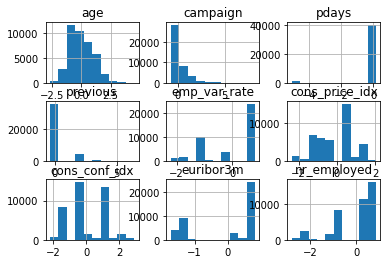

In [ ]:
numerical_scaled.hist()

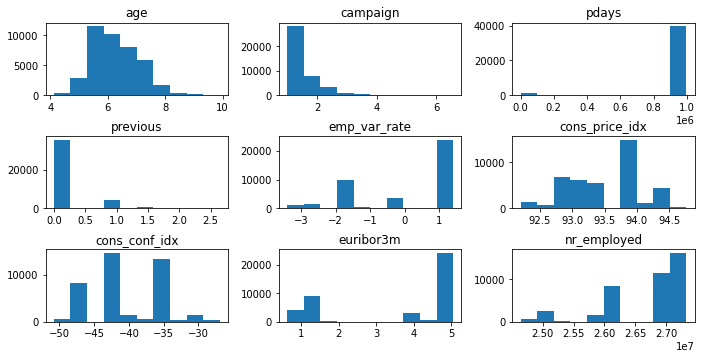

In [ ]:
# Histograms after scaling

columns = numerical_cols
fig, axes = plt.subplots(3,3,figsize=(10,5), )
plt.tight_layout(2)

axes[0,0].hist(numerical_df[columns[0]])
axes[0,1].hist(numerical_df[columns[1]])
axes[0,2].hist(numerical_df[columns[2]])
axes[1,0].hist(numerical_df[columns[3]])
axes[1,1].hist(numerical_df[columns[4]])
axes[1,2].hist(numerical_df[columns[5]])
axes[2,0].hist(numerical_df[columns[6]])
axes[2,1].hist(numerical_df[columns[7]])
axes[2,2].hist(numerical_df[columns[8]])

axes[0,0].title.set_text(columns[0])
axes[0,1].title.set_text(columns[1])
axes[0,2].title.set_text(columns[2])
axes[1,0].title.set_text(columns[3])
axes[1,1].title.set_text(columns[4])
axes[1,2].title.set_text(columns[5])
axes[2,0].title.set_text(columns[6])
axes[2,1].title.set_text(columns[7])
axes[2,2].title.set_text(columns[8])
plt.show()

In [ ]:
# join the data frames
final_df = numerical_scaled.join(categorical_df)
final_df.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0.445054,-0.777848,0.195418,-0.388031,0.839070,-0.227446,0.951286,0.773588,0.849353,1,1,0,1,2,0,0,1,2,1
1,1.248818,-0.777848,0.195418,-0.388031,-0.115765,-0.648982,-0.323520,0.230472,0.395111,9,1,7,0,0,0,0,7,0,1
2,-1.222151,0.411124,-5.117318,3.259418,-1.134256,0.828120,0.151832,-1.667551,-2.411444,4,2,6,0,2,0,0,4,2,2
3,-0.037373,-0.105096,0.195418,-0.388031,-1.197911,-0.864932,-1.425471,-1.277799,-0.947973,7,1,3,0,0,0,0,0,0,1
4,1.417917,-0.777848,-5.117462,2.191105,-1.898124,-2.374858,1.966810,-1.586833,-1.262340,5,1,0,0,2,0,0,1,0,2


In [ ]:
final_df.shape

(41187, 19)

In [ ]:
target.shape

(41187, 1)

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
age,1.000000,0.005090,-0.022612,0.009761,0.018020,0.009549,0.125409,0.030028,0.004584,-0.005651,-0.402831,-0.115323,0.172736,-0.002549,-0.007338,0.015020,-0.024568,-0.018898,0.017822
campaign,0.005090,1.000000,0.058625,-0.093934,0.159988,0.130888,-0.015865,0.141767,0.153028,-0.007592,-0.009380,0.001196,0.036004,-0.011957,0.008521,0.079840,-0.066436,-0.048936,0.033977
pdays,-0.022612,0.058625,1.000000,-0.552769,0.270945,0.078715,-0.091261,0.296919,0.371062,-0.028461,-0.037971,-0.046616,0.080061,-0.010518,0.000360,0.117962,-0.047887,-0.009504,-0.475212
previous,0.009761,-0.093934,-0.552769,1.000000,-0.464047,-0.267458,-0.078787,-0.488756,-0.512739,0.018029,0.038124,0.034413,-0.106642,0.023963,-0.000474,-0.236415,0.112308,-0.007146,-0.419836
emp_var_rate,0.018020,0.159988,0.270945,-0.464047,1.000000,0.775332,0.196030,0.972244,0.908831,-0.008255,-0.084206,-0.043795,0.203243,-0.060195,0.001835,0.393574,-0.178797,0.033256,0.192970
cons_price_idx,0.009549,0.130888,0.078715,-0.267458,0.775332,1.000000,0.058972,0.688226,0.525285,-0.016000,-0.057472,-0.081627,0.168048,-0.080503,-0.002446,0.591467,-0.004253,0.005656,0.211328
cons_conf_idx,0.125409,-0.015865,-0.091261,-0.078787,0.196030,0.058972,1.000000,0.277675,0.102341,0.052784,-0.033777,0.078778,0.026482,-0.033844,-0.012045,0.251593,0.009635,0.041481,0.178286
euribor3m,0.030028,0.141767,0.296919,-0.488756,0.972244,0.688226,0.277675,1.000000,0.946391,-0.007862,-0.091935,-0.036399,0.195313,-0.059276,0.000109,0.399761,-0.117279,0.039056,0.184142
nr_employed,0.004584,0.153028,0.371062,-0.512739,0.908831,0.525285,0.102341,0.946391,1.000000,-0.019213,-0.086145,-0.040943,0.189723,-0.045952,0.003871,0.268874,-0.222459,0.028555,0.121034
job,-0.005651,-0.007592,-0.028461,0.018029,-0.008255,-0.016000,0.052784,-0.007862,-0.019213,1.000000,0.027891,0.134151,-0.028230,0.006960,-0.010186,-0.025100,-0.033195,-0.000862,0.011509


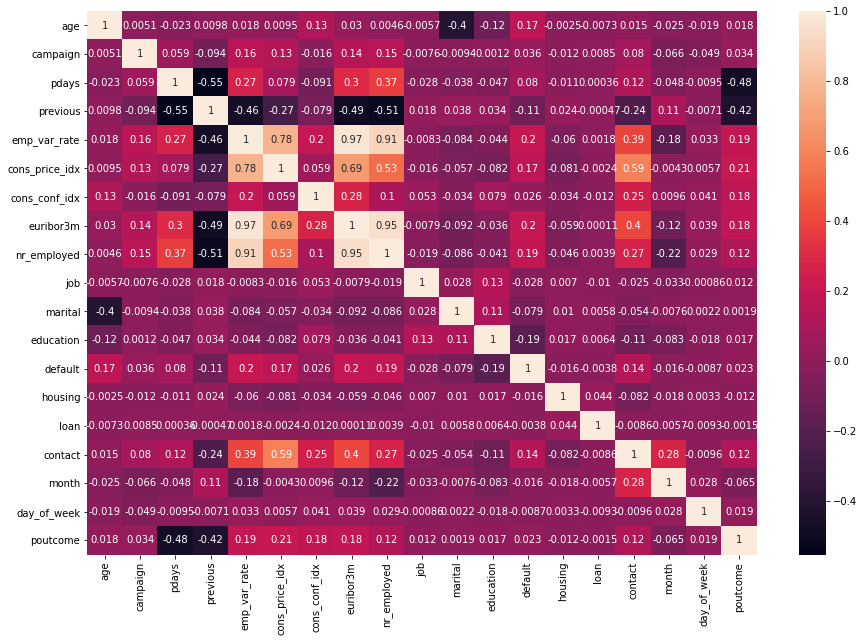

In [ ]:
# correlation matrix

plt.figure(figsize=(15, 10))

correlation_matrix = final_df.corr()
sns.heatmap(correlation_matrix,annot=True)
correlation_matrix

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
age,1.000000,0.005090,-0.022612,0.009761,0.018020,0.009549,0.125409,0.030028,0.004584,-0.005651,-0.402831,-0.115323,0.172736,-0.002549,-0.007338,0.015020,-0.024568,-0.018898,0.017822,0.016274
campaign,0.005090,1.000000,0.058625,-0.093934,0.159988,0.130888,-0.015865,0.141767,0.153028,-0.007592,-0.009380,0.001196,0.036004,-0.011957,0.008521,0.079840,-0.066436,-0.048936,0.033977,-0.071140
pdays,-0.022612,0.058625,1.000000,-0.552769,0.270945,0.078715,-0.091261,0.296919,0.371062,-0.028461,-0.037971,-0.046616,0.080061,-0.010518,0.000360,0.117962,-0.047887,-0.009504,-0.475212,-0.324876
previous,0.009761,-0.093934,-0.552769,1.000000,-0.464047,-0.267458,-0.078787,-0.488756,-0.512739,0.018029,0.038124,0.034413,-0.106642,0.023963,-0.000474,-0.236415,0.112308,-0.007146,-0.419836,0.217468
emp_var_rate,0.018020,0.159988,0.270945,-0.464047,1.000000,0.775332,0.196030,0.972244,0.908831,-0.008255,-0.084206,-0.043795,0.203243,-0.060195,0.001835,0.393574,-0.178797,0.033256,0.192970,-0.298331
cons_price_idx,0.009549,0.130888,0.078715,-0.267458,0.775332,1.000000,0.058972,0.688226,0.525285,-0.016000,-0.057472,-0.081627,0.168048,-0.080503,-0.002446,0.591467,-0.004253,0.005656,0.211328,-0.136206
cons_conf_idx,0.125409,-0.015865,-0.091261,-0.078787,0.196030,0.058972,1.000000,0.277675,0.102341,0.052784,-0.033777,0.078778,0.026482,-0.033844,-0.012045,0.251593,0.009635,0.041481,0.178286,0.054886
euribor3m,0.030028,0.141767,0.296919,-0.488756,0.972244,0.688226,0.277675,1.000000,0.946391,-0.007862,-0.091935,-0.036399,0.195313,-0.059276,0.000109,0.399761,-0.117279,0.039056,0.184142,-0.307768
nr_employed,0.004584,0.153028,0.371062,-0.512739,0.908831,0.525285,0.102341,0.946391,1.000000,-0.019213,-0.086145,-0.040943,0.189723,-0.045952,0.003871,0.268874,-0.222459,0.028555,0.121034,-0.353614
job,-0.005651,-0.007592,-0.028461,0.018029,-0.008255,-0.016000,0.052784,-0.007862,-0.019213,1.000000,0.027891,0.134151,-0.028230,0.006960,-0.010186,-0.025100,-0.033195,-0.000862,0.011509,0.025114


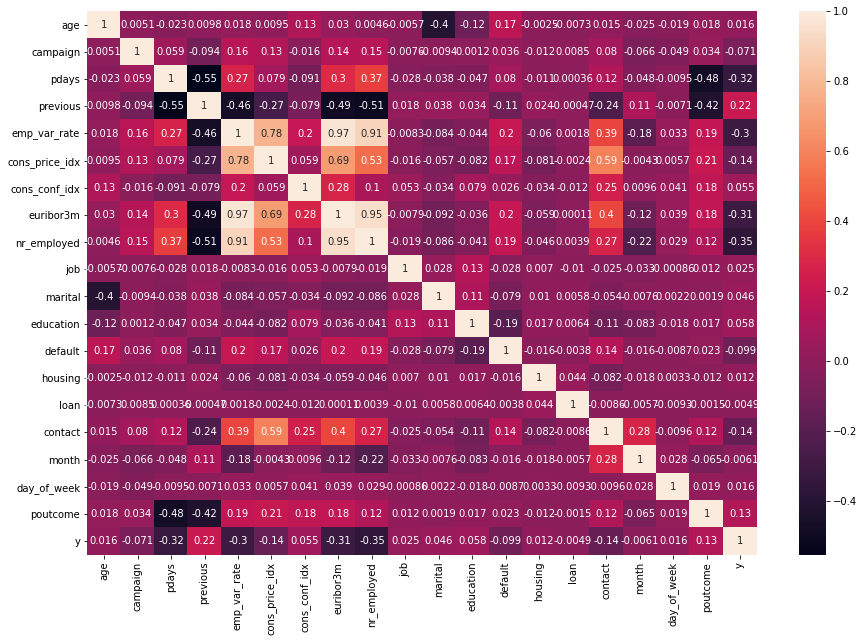

In [ ]:
# correlation matrix

plt.figure(figsize=(15, 10))

correlation_matrix = pd.concat([final_df, target], axis=1).corr()
sns.heatmap(correlation_matrix,annot=True)
correlation_matrix

In [ ]:
# apply the PCA for feature reduction
pca = PCA(.95)
pca.fit(final_df)
print(pca.n_components_)
pca.explained_variance_ratio_.sum()

11


0.9574898963034943

In [ ]:
pca.explained_variance_ratio_

array([0.36082316, 0.15869864, 0.12599641, 0.09960123, 0.05408758,
       0.03646819, 0.03039854, 0.02685646, 0.02655327, 0.02361489,
       0.01439153])

In [ ]:
X_pca = pca.transform(final_df)

DF = pd.DataFrame(data =X_pca)
DF

,0,1,2,3,4,5,6,7,8,9,10
0,-3.026783,-2.791955,-3.744721,1.577710,-0.186368,0.516682,-0.845725,-0.591507,-1.294419,-0.527430,-0.229513
1,5.506583,2.071437,2.380262,-2.050687,2.075054,-0.052427,-1.390662,-0.656896,0.897372,1.137120,-0.189934
2,0.670524,0.813100,3.969744,2.689714,-0.390814,3.915477,3.697428,0.759081,-1.192661,-0.047433,-0.790819
3,3.324889,-2.954737,-0.457814,3.734941,1.902141,-1.110059,0.007262,-0.533285,1.249743,0.474871,-0.484531
4,1.077304,-0.616761,-1.444522,6.770731,1.332458,4.775230,-0.175122,-0.303130,-1.436497,-1.275660,-0.540687
...,...,...,...,...,...,...,...,...,...,...,...
41182,1.129867,-0.499566,-1.843979,-1.180096,0.113617,0.890680,-0.765364,-0.481004,0.685418,1.715486,1.538007
41183,-1.262162,1.984137,-3.722652,-0.579913,0.080904,0.290143,0.594660,-1.080941,0.545398,-0.968494,-0.227040
41184,-3.496330,0.539903,1.881574,-2.929806,-1.885702,0.310192,-0.288408,0.826935,-0.817990,-0.430093,1.465249
41185,5.300843,4.581102,2.063562,0.532127,-1.033716,0.510612,-2.656411,-0.568140,1.245091,-2.516776,1.575179


In [ ]:
# Split the data

X_df = DF

X_train, X_test, Y_train, Y_test = train_test_split(X_df, target, test_size=0.2,random_state=101)

# reset the indexes
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

print("X_train shape:",X_train.shape,"    y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape,"     y_test shape:", Y_test.shape)

X_train shape: (32949, 11)     y_train shape: (32949, 1)
X_test shape: (8238, 11)      y_test shape: (8238, 1)


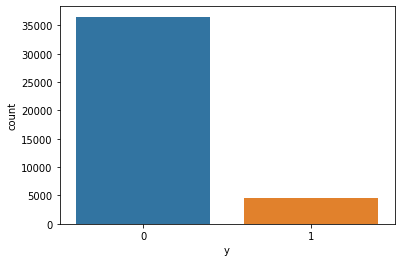

In [ ]:
# class imbalance
sns.countplot(target['y'])

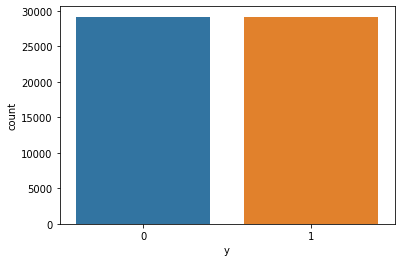

In [ ]:
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(X_train, Y_train)
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = X_train.columns)
df_oversampler_target = pd.DataFrame(y, columns = ['y'])
sns.countplot(df_oversampler_target['y'])

In [ ]:
df_oversampler.shape

(58364, 11)

In [ ]:
df_oversampler_target.shape

(58364, 1)

In [ ]:
X_train.shape

(32949, 11)

Before Fixing the Class Imbalance

C = 100, gamma = 0.5

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter    
svc = svm.SVC(kernel='rbf', C=100, gamma=0.5).fit(X_train, Y_train)

#gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

In [ ]:
y_predicted = svc.predict(X_test)

In [ ]:
y_predicted.shape

(8238,)

In [ ]:
# Check the performance
print('Accuracy: %.3f' % accuracy_score(Y_test, y_predicted))
print("MSE:",mean_squared_error(Y_test, y_predicted))

Accuracy: 0.858
MSE: 0.14166059723233795


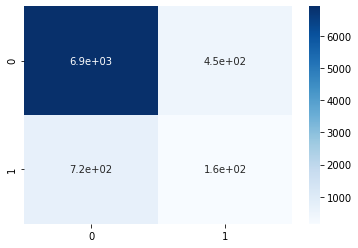

In [ ]:
# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_predicted)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.show()

In [ ]:
# Model Precision
print("Precision :",metrics.precision_score(Y_test, y_predicted))
 
# Model Recall
print("Recall :",metrics.recall_score(Y_test, y_predicted))

Precision : 0.25901639344262295
Recall : 0.18098510882016036


In [ ]:
print(confusion_matrix(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))

[[6913  452]
 [ 715  158]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7365
           1       0.26      0.18      0.21       873

    accuracy                           0.86      8238
   macro avg       0.58      0.56      0.57      8238
weighted avg       0.84      0.86      0.85      8238



C = 100, gamma = 1.5

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter     
svc = svm.SVC(kernel='rbf', C=100, gamma=1.5).fit(X_train, Y_train)

#gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

In [ ]:
y_predicted = svc.predict(X_test)

In [ ]:
y_predicted.shape

(8238,)

In [ ]:
# Check the performance
print('Accuracy: %.3f' % accuracy_score(Y_test, y_predicted))
print("MSE:",mean_squared_error(Y_test, y_predicted))

Accuracy: 0.865
MSE: 0.13546977421704298


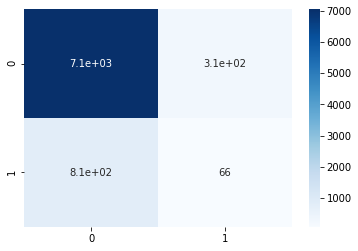

In [ ]:
# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_predicted)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.show()

In [ ]:
# Model Precision
print("Precision :",metrics.precision_score(Y_test, y_predicted))
 
# Model Recall
print("Recall :",metrics.recall_score(Y_test, y_predicted))

Precision : 0.176
Recall : 0.07560137457044673


In [ ]:
print(confusion_matrix(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))

[[7056  309]
 [ 807   66]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7365
           1       0.18      0.08      0.11       873

    accuracy                           0.86      8238
   macro avg       0.54      0.52      0.52      8238
weighted avg       0.82      0.86      0.84      8238



C = 10, gamma = 0.5

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter     
svc = svm.SVC(kernel='rbf', C=10, gamma=0.5).fit(X_train, Y_train)

#gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

In [ ]:
y_predicted = svc.predict(X_test)

In [ ]:
y_predicted.shape

(8238,)

In [ ]:
# Check the performance
print('Accuracy: %.3f' % accuracy_score(Y_test, y_predicted))
print("MSE:",mean_squared_error(Y_test, y_predicted))

Accuracy: 0.872
MSE: 0.12782228696285505


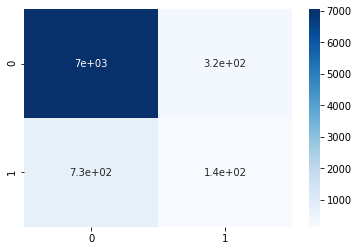

In [ ]:
# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_predicted)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.show()

In [ ]:
# Model Precision
print("Precision :",metrics.precision_score(Y_test, y_predicted))
 
# Model Recall
print("Recall :",metrics.recall_score(Y_test, y_predicted))

Precision : 0.3034934497816594
Recall : 0.15922107674684993


In [ ]:
print(confusion_matrix(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))

[[7046  319]
 [ 734  139]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7365
           1       0.30      0.16      0.21       873

    accuracy                           0.87      8238
   macro avg       0.60      0.56      0.57      8238
weighted avg       0.84      0.87      0.85      8238




C = 10, gamma = 1.5

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter     
svc = svm.SVC(kernel='rbf', C=10, gamma=1.5).fit(X_train, Y_train)

#gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

In [ ]:
y_predicted = svc.predict(X_test)

In [ ]:
y_predicted.shape

(8238,)

In [ ]:
# Check the performance
print('Accuracy: %.3f' % accuracy_score(Y_test, y_predicted))
print("MSE:",mean_squared_error(Y_test, y_predicted))

Accuracy: 0.875
MSE: 0.12478756979849479


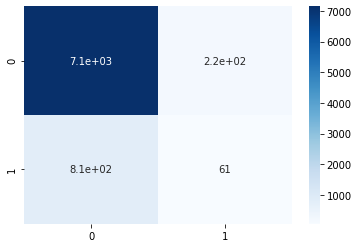

In [ ]:
# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_predicted)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.show()

In [ ]:
# Model Precision
print("Precision :",metrics.precision_score(Y_test, y_predicted))
 
# Model Recall
print("Recall :",metrics.recall_score(Y_test, y_predicted))

Precision : 0.22021660649819494
Recall : 0.06987399770904926


In [ ]:
print(confusion_matrix(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))

[[7149  216]
 [ 812   61]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7365
           1       0.22      0.07      0.11       873

    accuracy                           0.88      8238
   macro avg       0.56      0.52      0.52      8238
weighted avg       0.83      0.88      0.85      8238



After Fixing the Class Imbalance

C = 100, gamma = 0.5

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter     2 Dimensions
svc = svm.SVC(kernel='rbf', C=100, gamma=0.5).fit(df_oversampler, df_oversampler_target)

#gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

In [ ]:
y_predicted_fixedclass = svc.predict(X_test)

In [ ]:
y_predicted_fixedclass.shape

(8238,)

In [ ]:
# Check the performance
print('Accuracy: %.3f' % accuracy_score(Y_test, y_predicted_fixedclass))
print("MSE:",mean_squared_error(Y_test, y_predicted_fixedclass))

Accuracy: 0.827
MSE: 0.17285748968196163


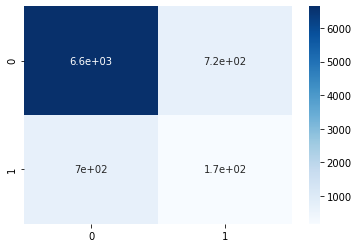

In [ ]:
# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_predicted_fixedclass)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.show()

In [ ]:
# Model Precision
print("Precision :",metrics.precision_score(Y_test, y_predicted_fixedclass))
 
# Model Recall
print("Recall :",metrics.recall_score(Y_test, y_predicted_fixedclass))

Precision : 0.19079685746352412
Recall : 0.19473081328751432


In [ ]:
print(confusion_matrix(Y_test, y_predicted_fixedclass))
print(classification_report(Y_test, y_predicted_fixedclass))

[[6644  721]
 [ 703  170]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7365
           1       0.19      0.19      0.19       873

    accuracy                           0.83      8238
   macro avg       0.55      0.55      0.55      8238
weighted avg       0.83      0.83      0.83      8238



C = 100, gamma = 1.5

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter     
svc = svm.SVC(kernel='rbf', C=100, gamma=1.5).fit(df_oversampler, df_oversampler_target)

In [ ]:
y_predicted_fixedclass = svc.predict(X_test)

In [ ]:
y_predicted_fixedclass.shape

(8238,)

In [ ]:
# Check the performance
print('Accuracy: %.3f' % accuracy_score(Y_test, y_predicted_fixedclass))
print("MSE:",mean_squared_error(Y_test, y_predicted_fixedclass))

Accuracy: 0.841
MSE: 0.15865501335275553


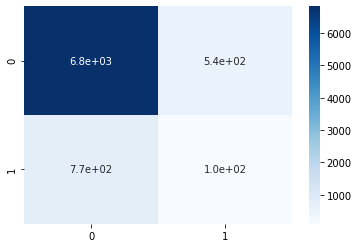

In [ ]:
# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_predicted_fixedclass)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.show()

In [ ]:
# Model Precision
print("Precision :",metrics.precision_score(Y_test, y_predicted_fixedclass))
 
# Model Recall
print("Recall :",metrics.recall_score(Y_test, y_predicted_fixedclass))

Precision : 0.16304347826086957
Recall : 0.12027491408934708


In [ ]:
print(confusion_matrix(Y_test, y_predicted_fixedclass))
print(classification_report(Y_test, y_predicted_fixedclass))

[[6826  539]
 [ 768  105]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7365
           1       0.16      0.12      0.14       873

    accuracy                           0.84      8238
   macro avg       0.53      0.52      0.53      8238
weighted avg       0.82      0.84      0.83      8238



C = 10, gamma = 0.5

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter    
svc = svm.SVC(kernel='rbf', C=10, gamma=0.5).fit(df_oversampler, df_oversampler_target)

In [ ]:
y_predicted_fixedclass = svc.predict(X_test)

In [ ]:
y_predicted_fixedclass.shape

(8238,)

In [ ]:
# Check the performance
print('Accuracy: %.3f' % accuracy_score(Y_test, y_predicted_fixedclass))
print("MSE:",mean_squared_error(Y_test, y_predicted_fixedclass))

Accuracy: 0.815
MSE: 0.18475358096625394


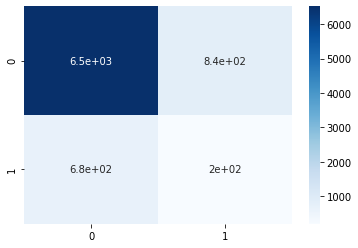

In [ ]:
# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_predicted_fixedclass)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.show()

In [ ]:
# Model Precision
print("Precision :",metrics.precision_score(Y_test, y_predicted_fixedclass))
 
# Model Recall
print("Recall :",metrics.recall_score(Y_test, y_predicted_fixedclass))

Precision : 0.1882804995196926
Recall : 0.22451317296678122


In [ ]:
print(confusion_matrix(Y_test, y_predicted_fixedclass))
print(classification_report(Y_test, y_predicted_fixedclass))

[[6520  845]
 [ 677  196]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7365
           1       0.19      0.22      0.20       873

    accuracy                           0.82      8238
   macro avg       0.55      0.55      0.55      8238
weighted avg       0.83      0.82      0.82      8238



C = 10, gamma = 1.5

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter    
svc = svm.SVC(kernel='rbf', C=10, gamma=1.5).fit(df_oversampler, df_oversampler_target)

In [ ]:
y_predicted_fixedclass = svc.predict(X_test)

In [ ]:
y_predicted_fixedclass.shape

In [ ]:
# Check the performance
print('Accuracy: %.3f' % accuracy_score(Y_test, y_predicted_fixedclass))
print("MSE:",mean_squared_error(Y_test, y_predicted_fixedclass))

Accuracy: 0.836
MSE: 0.1636319495023064


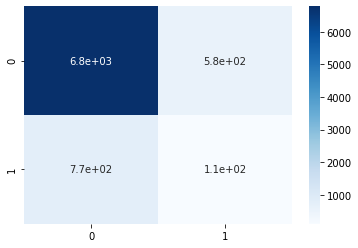

In [ ]:
# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_predicted_fixedclass)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.show()

In [ ]:
# Model Precision
print("Precision :",metrics.precision_score(Y_test, y_predicted_fixedclass))
 
# Model Recall
print("Recall :",metrics.recall_score(Y_test, y_predicted_fixedclass))

Precision : 0.15529753265602322
Recall : 0.12256586483390607


In [ ]:
print(confusion_matrix(Y_test, y_predicted_fixedclass))
print(classification_report(Y_test, y_predicted_fixedclass))

[[6783  582]
 [ 766  107]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7365
           1       0.16      0.12      0.14       873

    accuracy                           0.84      8238
   macro avg       0.53      0.52      0.52      8238
weighted avg       0.82      0.84      0.83      8238

